In [106]:
import pandas as pd

In [107]:
df = pd.read_csv('processed_final_data.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20608 entries, 0 to 20607
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20608 non-null  int64  
 1   steam_appid      20608 non-null  int64  
 2   about_the_game   20608 non-null  object 
 3   name             20604 non-null  object 
 4   developer        20561 non-null  object 
 5   publisher        20587 non-null  object 
 6   score_rank       34 non-null     float64
 7   positive         20608 non-null  int64  
 8   negative         20608 non-null  int64  
 9   userscore        20608 non-null  int64  
 10  owners           20608 non-null  float64
 11  average_forever  20608 non-null  int64  
 12  average_2weeks   20608 non-null  int64  
 13  median_forever   20608 non-null  int64  
 14  median_2weeks    20608 non-null  int64  
 15  price            20608 non-null  int64  
 16  initialprice     20608 non-null  int64  
 17  discount    

In [109]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('score_rank', inplace = True, axis =1)

In [110]:
df.columns

Index(['steam_appid', 'about_the_game', 'name', 'developer', 'publisher',
       'positive', 'negative', 'userscore', 'owners', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'discount', 'ccu', 'languages', 'genre', 'tags',
       'minimum'],
      dtype='object')

In [111]:
df.head(5)

,steam_appid,about_the_game,name,developer,publisher,positive,negative,userscore,owners,average_forever,...,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags,minimum
0,1002,Featuring a wide collection of single and mult...,Rag Doll Kung Fu,Mark Healey,Mark Healey,88,28,0,50000.0,15,...,29,0,99,99,0,0,English,Indie,"{'2D Fighter': 47, 'Martial Arts': 41, 'Intent...","Pentium3 800 MHz (or compatible), 256 MB RAM, ..."
1,1200,Fight in the theatre of war that changed the w...,Red Orchestra: Ostfront 41-45,Tripwire Interactive,Tripwire Interactive,2103,309,0,1000000.0,488,...,238,0,499,499,0,13,"English, French, Russian",Action,"{'World War II': 164, 'Action': 130, 'FPS': 12...",OS: Windows XP Processor: 1.2 GHZ or Equivalen...
2,1300,"You are John Blade, commander of HardCorps, an...",SiN Episodes: Emergence,Ritual Entertainment,Ritual Entertainment,992,118,0,200000.0,112,...,175,0,999,999,0,3,"English, Russian, French",Action,"{'Action': 118, 'FPS': 76, 'Cyberpunk': 49, 'S...","1.2 GHz Processor, 256MB RAM, DirectX 7 level ..."
3,1500,Combining fast-paced action with strategic bat...,Darwinia,Introversion Software,Introversion Software,840,210,0,200000.0,456,...,399,0,999,999,0,1,"English, German, French, Italian, Spanish - Spain","Indie, Strategy","{'Indie': 573, 'Tactical RPG': 445, ""Shoot 'Em...","Recommended: Windows XP, 600MHz CPU, 128MB RAM..."
4,1520,"Inspired by the 1983 cult classic film, Wargam...",DEFCON,Introversion Software,Introversion Software,3504,522,0,500000.0,172,...,34,0,999,999,0,16,"English, French, German, Italian, Spanish - Spain","Indie, Strategy","{'Cold War': 451, 'Wargame': 438, 'RTS': 431, ...","Recommended: Windows XP, P3-600-Geforce 2, 128..."


In [112]:
df.isna().sum()

steam_appid         0
about_the_game      0
name                4
developer          47
publisher          21
positive            0
negative            0
userscore           0
owners              0
average_forever     0
average_2weeks      0
median_forever      0
median_2weeks       0
price               0
initialprice        0
discount            0
ccu                 0
languages           1
genre              56
tags                0
minimum             4
dtype: int64

In [113]:
df.dropna(inplace = True)

##### we combine the positive and negative to create the targte column for our prediction


In [114]:
df['negative'] = -1*df['negative']

In [115]:
df['cum_review'] = df['positive'] + df['negative']

In [116]:
df.reset_index(inplace= True)

##### we drop the positive and negative columns and just retain the cumulative reviews which will be our traget column.

In [117]:
df.drop(columns = ['positive', 'negative'], inplace= True)
df.drop(columns = ['index'], inplace = True)

##### we drop the userscore as most of the values are 0 and we get the same information from the cumulative reviews column. 

In [118]:
df.drop(columns = ['userscore'],inplace= True)

In [240]:
df.to_csv('cleaned_final_data.csv')

In [53]:
import pandas as pd
df = pd.read_csv('cleaned_final_data.csv')

In [54]:
df['cum_review']

0          60
1        1794
2         874
3         630
4        2982
         ... 
20516      10
20517       7
20518      11
20519      -8
20520       9
Name: cum_review, Length: 20521, dtype: int64

In [57]:
df['star_rating'] = pd.qcut(df['cum_review'], q=3, labels=[1, 2, 3])
print(df['star_rating'].value_counts())

1    6903
3    6835
2    6783
Name: star_rating, dtype: int64


In [58]:
df['star_rating'].value_counts()

1    6903
3    6835
2    6783
Name: star_rating, dtype: int64

In [6]:
df.head()

,Unnamed: 0,steam_appid,about_the_game,name,developer,publisher,owners,average_forever,average_2weeks,median_forever,...,price,initialprice,discount,ccu,languages,genre,tags,minimum,cum_review,star_rating
0,0,1002,Featuring a wide collection of single and mult...,Rag Doll Kung Fu,Mark Healey,Mark Healey,50000.0,15,0,29,...,99,99,0,0,English,Indie,"{'2D Fighter': 47, 'Martial Arts': 41, 'Intent...","Pentium3 800 MHz (or compatible), 256 MB RAM, ...",60,2
1,1,1200,Fight in the theatre of war that changed the w...,Red Orchestra: Ostfront 41-45,Tripwire Interactive,Tripwire Interactive,1000000.0,488,0,238,...,499,499,0,13,"English, French, Russian",Action,"{'World War II': 164, 'Action': 130, 'FPS': 12...",OS: Windows XP Processor: 1.2 GHZ or Equivalen...,1794,3
2,2,1300,"You are John Blade, commander of HardCorps, an...",SiN Episodes: Emergence,Ritual Entertainment,Ritual Entertainment,200000.0,112,0,175,...,999,999,0,3,"English, Russian, French",Action,"{'Action': 118, 'FPS': 76, 'Cyberpunk': 49, 'S...","1.2 GHz Processor, 256MB RAM, DirectX 7 level ...",874,3
3,3,1500,Combining fast-paced action with strategic bat...,Darwinia,Introversion Software,Introversion Software,200000.0,456,0,399,...,999,999,0,1,"English, German, French, Italian, Spanish - Spain","Indie, Strategy","{'Indie': 573, 'Tactical RPG': 445, ""Shoot 'Em...","Recommended: Windows XP, 600MHz CPU, 128MB RAM...",630,3
4,4,1520,"Inspired by the 1983 cult classic film, Wargam...",DEFCON,Introversion Software,Introversion Software,500000.0,172,0,34,...,999,999,0,16,"English, French, German, Italian, Spanish - Spain","Indie, Strategy","{'Cold War': 451, 'Wargame': 438, 'RTS': 431, ...","Recommended: Windows XP, P3-600-Geforce 2, 128...",2982,3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       20521 non-null  int64   
 1   steam_appid      20521 non-null  int64   
 2   about_the_game   20521 non-null  object  
 3   name             20521 non-null  object  
 4   developer        20521 non-null  object  
 5   publisher        20521 non-null  object  
 6   owners           20521 non-null  float64 
 7   average_forever  20521 non-null  int64   
 8   average_2weeks   20521 non-null  int64   
 9   median_forever   20521 non-null  int64   
 10  median_2weeks    20521 non-null  int64   
 11  price            20521 non-null  int64   
 12  initialprice     20521 non-null  int64   
 13  discount         20521 non-null  int64   
 14  ccu              20521 non-null  int64   
 15  languages        20521 non-null  object  
 16  genre            20521 non-null  object 

##### Preparing data for PCA

##### Lets select the numerical columns and our identfier as the final dataset on which we perform PCA

In [59]:
df_pca =  df[['steam_appid', 'owners','average_forever','average_2weeks', 'median_forever', 'median_2weeks', 'price',
             'initialprice', 'ccu', 'discount', 'star_rating']]

In [69]:
df_pca['steam_appid']

0           1002
1           1200
2           1300
3           1500
4           1520
          ...   
20516    1063560
20517    1064060
20518    1064580
20519    1065160
20520    1065230
Name: steam_appid, Length: 20521, dtype: int64

steam_appid          1610.0
owners             100000.0
average_forever        19.0
average_2weeks          0.0
median_forever         19.0
median_2weeks           0.0
price                 199.0
initialprice          999.0
ccu                    22.0
discount               80.0
star_rating             3.0
Name: 7, dtype: float64

In [26]:
df_labels = df['star_rating']

##### Here steam_appid id is the identifier and the star-rating is our target column. So we should drop the before feeding out data for PCA

In [27]:
df_pca.drop(columns = ['steam_appid', 'star_rating'], axis = 1,inplace=True)

/tmp/ipykernel_3349/2412122373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca.drop(columns = ['steam_appid', 'star_rating'], axis = 1,inplace=True)


##### Next we also drop average_2_weeks and median_2_weeks as most of the values are 0 which wont contribute much to the principal component analysis.

In [28]:
df_pca.drop(columns = ['average_2weeks', 'median_2weeks'], axis = 1, inplace = True)

/tmp/ipykernel_3349/1986083109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca.drop(columns = ['average_2weeks', 'median_2weeks'], axis = 1, inplace = True)


In [29]:
df_pca

,owners,average_forever,median_forever,price,initialprice,ccu,discount
0,50000.0,15,29,99,99,0,0
1,1000000.0,488,238,499,499,13,0
2,200000.0,112,175,999,999,3,0
3,200000.0,456,399,999,999,1,0
4,500000.0,172,34,999,999,16,0
...,...,...,...,...,...,...,...
20516,20000.0,0,0,399,399,0,0
20517,20000.0,0,0,99,99,0,0
20518,20000.0,0,0,99,99,0,0
20519,20000.0,0,0,0,0,0,0


In [19]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owners           20521 non-null  float64
 1   average_forever  20521 non-null  int64  
 2   median_forever   20521 non-null  int64  
 3   price            20521 non-null  int64  
 4   initialprice     20521 non-null  int64  
 5   ccu              20521 non-null  int64  
 6   discount         20521 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.1 MB


In [20]:
df_pca.head(5)

,owners,average_forever,median_forever,price,initialprice,ccu,discount
0,50000.0,15,29,99,99,0,0
1,1000000.0,488,238,499,499,13,0
2,200000.0,112,175,999,999,3,0
3,200000.0,456,399,999,999,1,0
4,500000.0,172,34,999,999,16,0


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

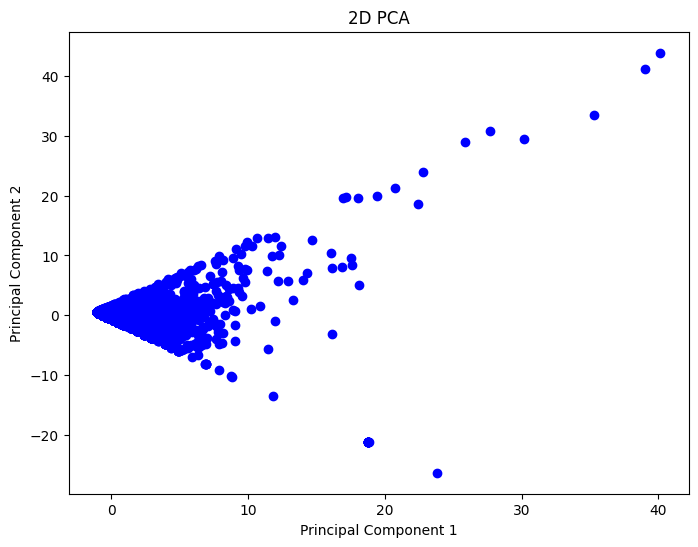

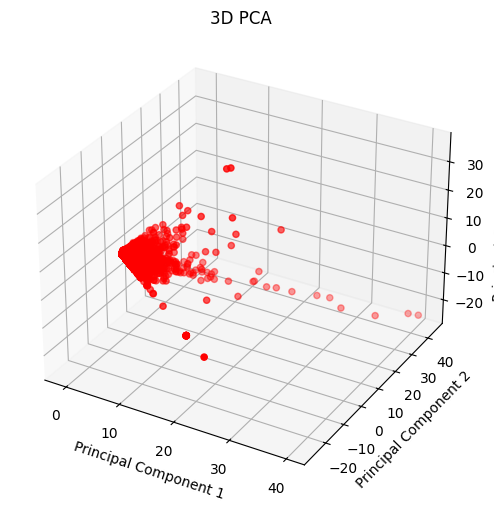

Variance retained in 2D PCA: 57.87%
Variance retained in 3D PCA: 75.16%


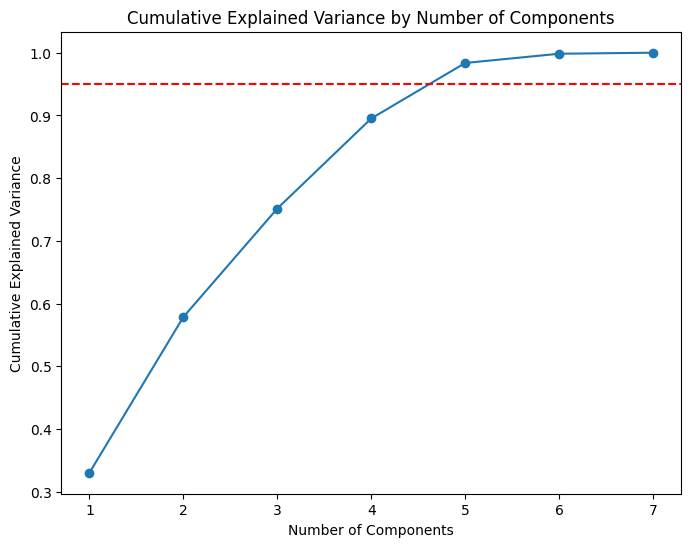

Number of components needed to retain at least 95% variance: 5
Top 3 eigenvalues: [2.31256536 1.7385467  1.21030368]


In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

pca_2_data = pca_2.fit_transform(df_scaled)
pca_3_data = pca_3.fit_transform(df_scaled)

## 2d data
plt.figure(figsize=(8, 6))
plt.scatter(pca_2_data[:, 0], pca_2_data[:, 1], c='blue')
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3D data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_data[:, 0], pca_3_data[:, 1], pca_3_data[:, 2], c='red')
ax.set_title('3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

explained_variance_2d = pca_2.explained_variance_ratio_.sum() * 100
print(f"Variance retained in 2D PCA: {explained_variance_2d:.2f}%")

explained_variance_3d = pca_3.explained_variance_ratio_.sum() * 100
print(f"Variance retained in 3D PCA: {explained_variance_3d:.2f}%")

pca_comp = PCA().fit(df_scaled)
explained_variance_cumulative = pca_comp.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

var_95 = (explained_variance_cumulative >= 0.95).argmax() + 1
print(f"Number of components needed to retain at least 95% variance: {var_95}")

eigenvalues = pca_comp.explained_variance_
top_3_eigenvalues = eigenvalues[:3]
print(f"Top 3 eigenvalues: {top_3_eigenvalues}")

In [32]:
## Almost 4 components to reach 90% varaince

In [33]:
s = [1,2,3,4]

/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

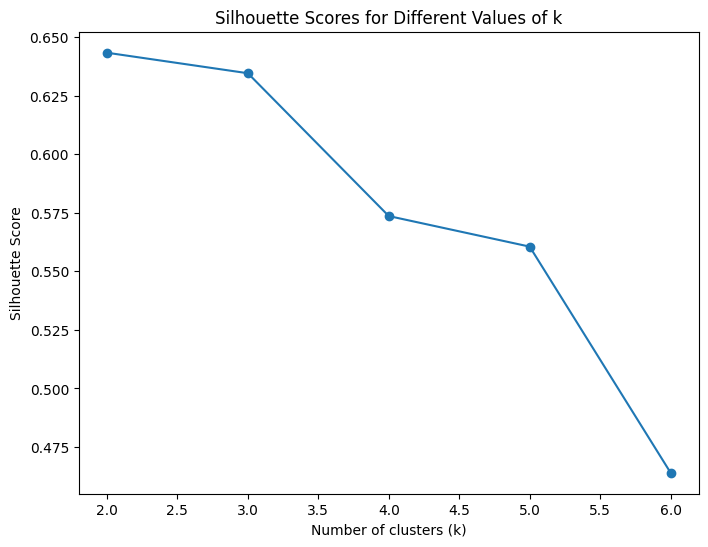

Best k values based on silhouette scores: [(2, 0.6432884196453053), (3, 0.6345345348076571), (4, 0.5735830681743284)]


/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


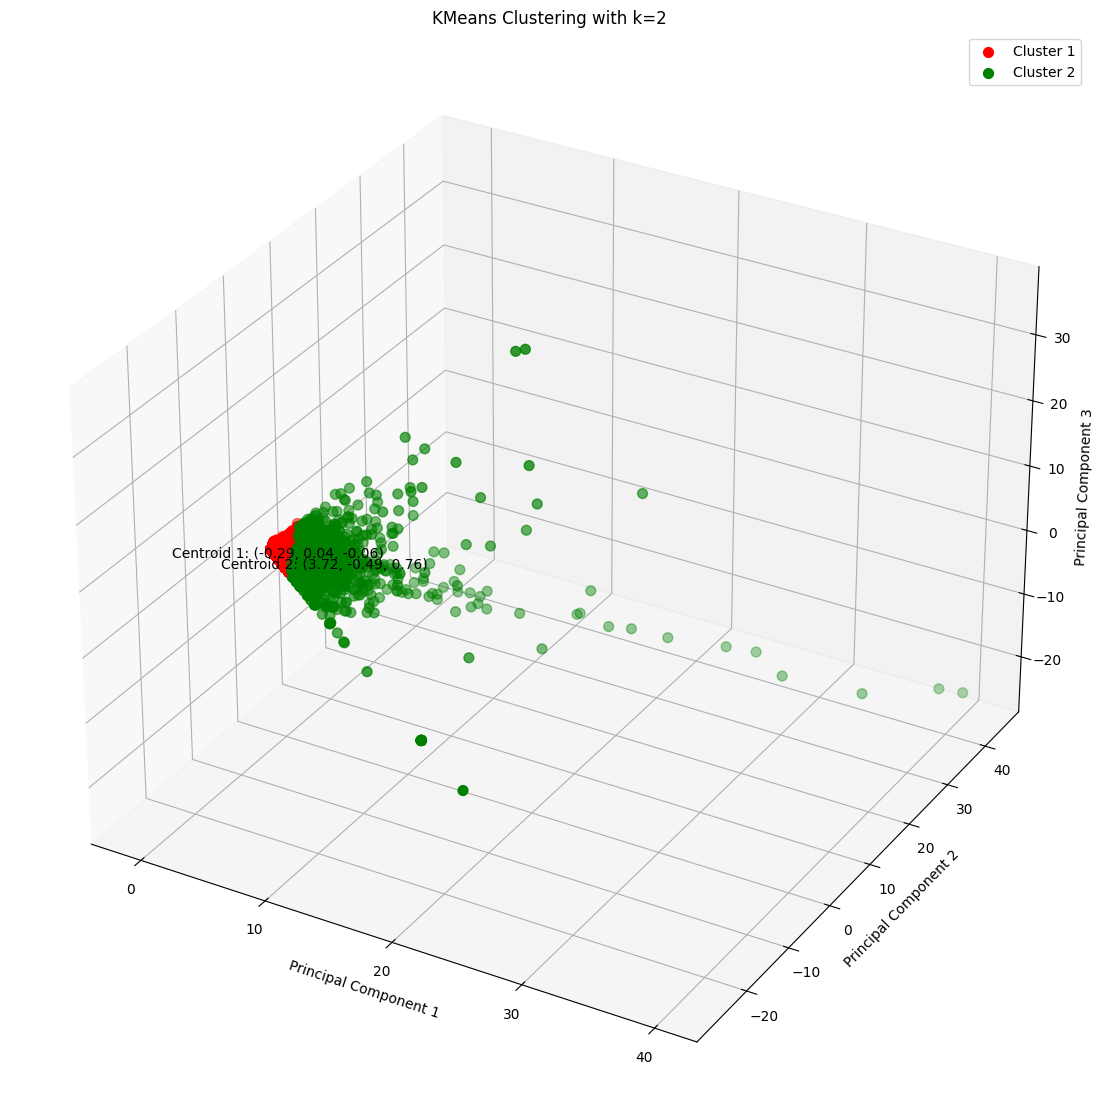

/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


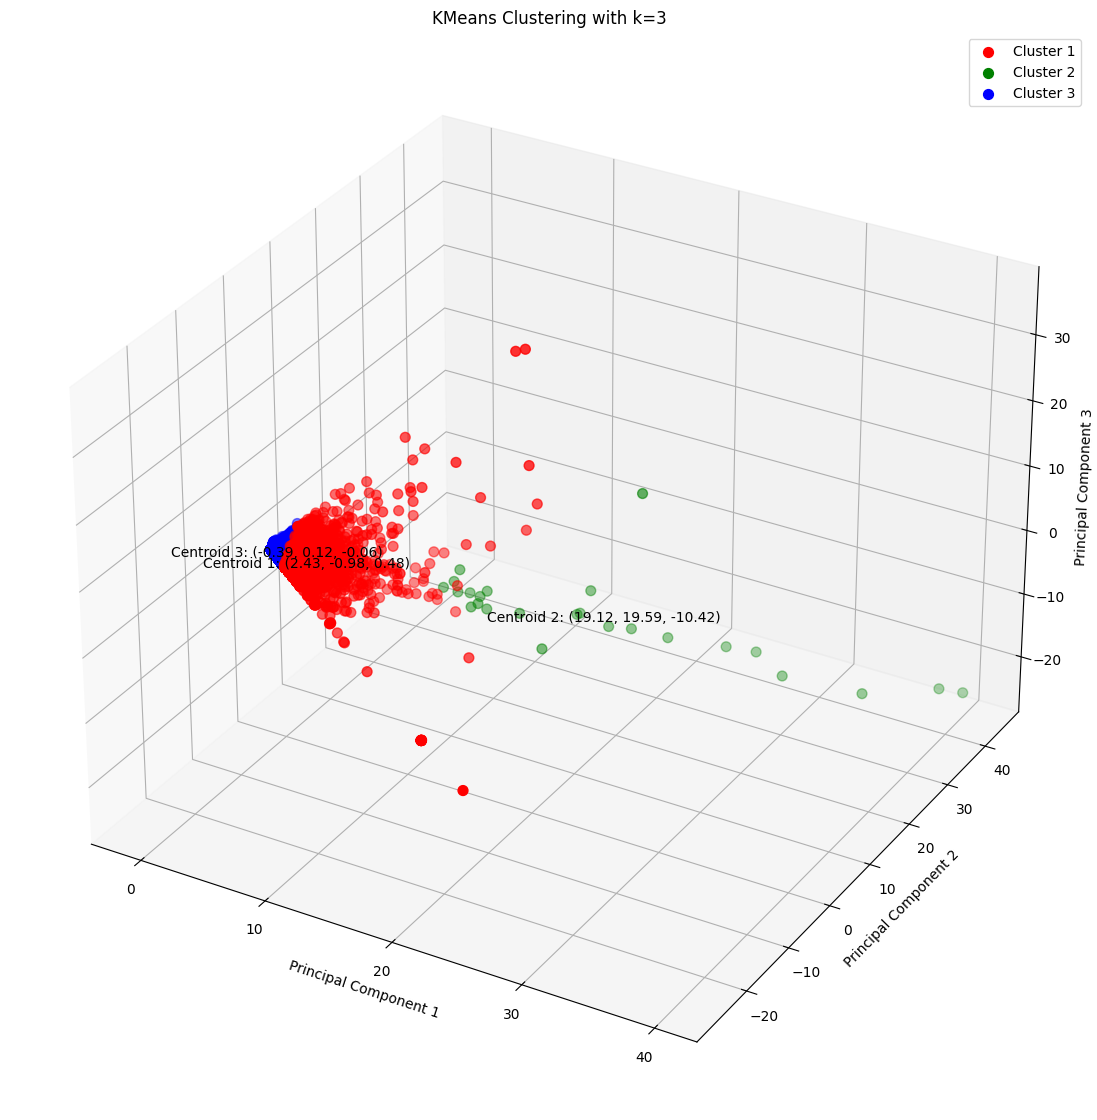

/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


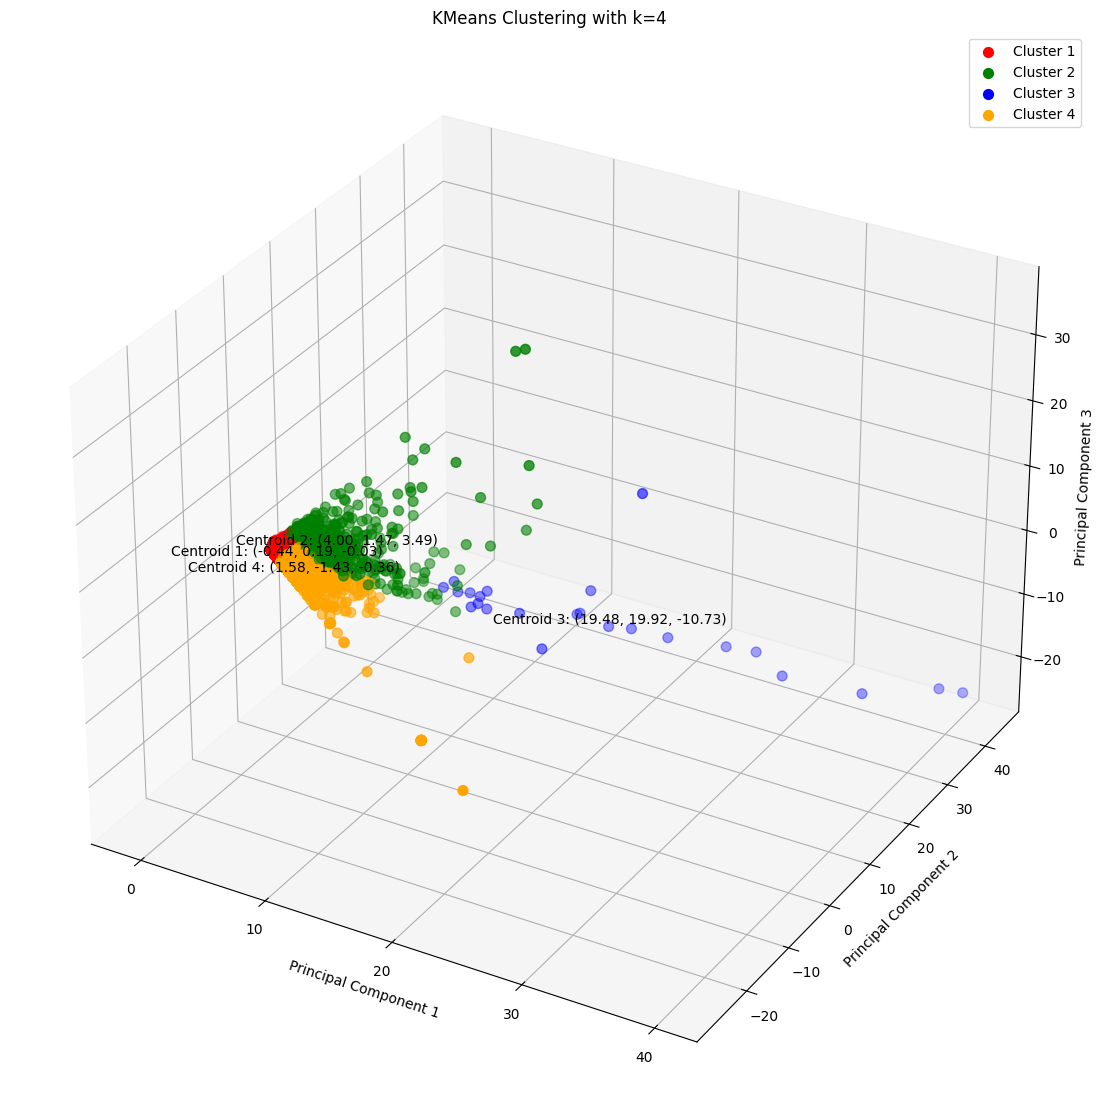

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled)  # Assuming df_scaled is the standardized data

range_k = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

best_k_values = sorted(zip(range_k, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]
print("Best k values based on silhouette scores:", best_k_values)

for k, _ in best_k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(pca_data)
    centroids = kmeans.cluster_centers_

    # Plot the 3D data with clusters and centroids
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red', 'green', 'blue', 'orange', 'pink']
    cmap = ListedColormap(colors)
    scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels, cmap=ListedColormap(colors[0:k]), s=50)
    
    for i, centroid in enumerate(centroids):
        ax.text(centroid[0], centroid[1], centroid[2], f'Centroid {i+1}: ({centroid[0]:.2f}, {centroid[1]:.2f}, {centroid[2]:.2f})', 
                color='black', fontsize=10, ha='center', va='center')
        
        
    legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

    for i in range(k):
        ax.scatter([], [], c=colors[i], label=legend_labels[i], s=50) 


    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.legend()
    plt.show()


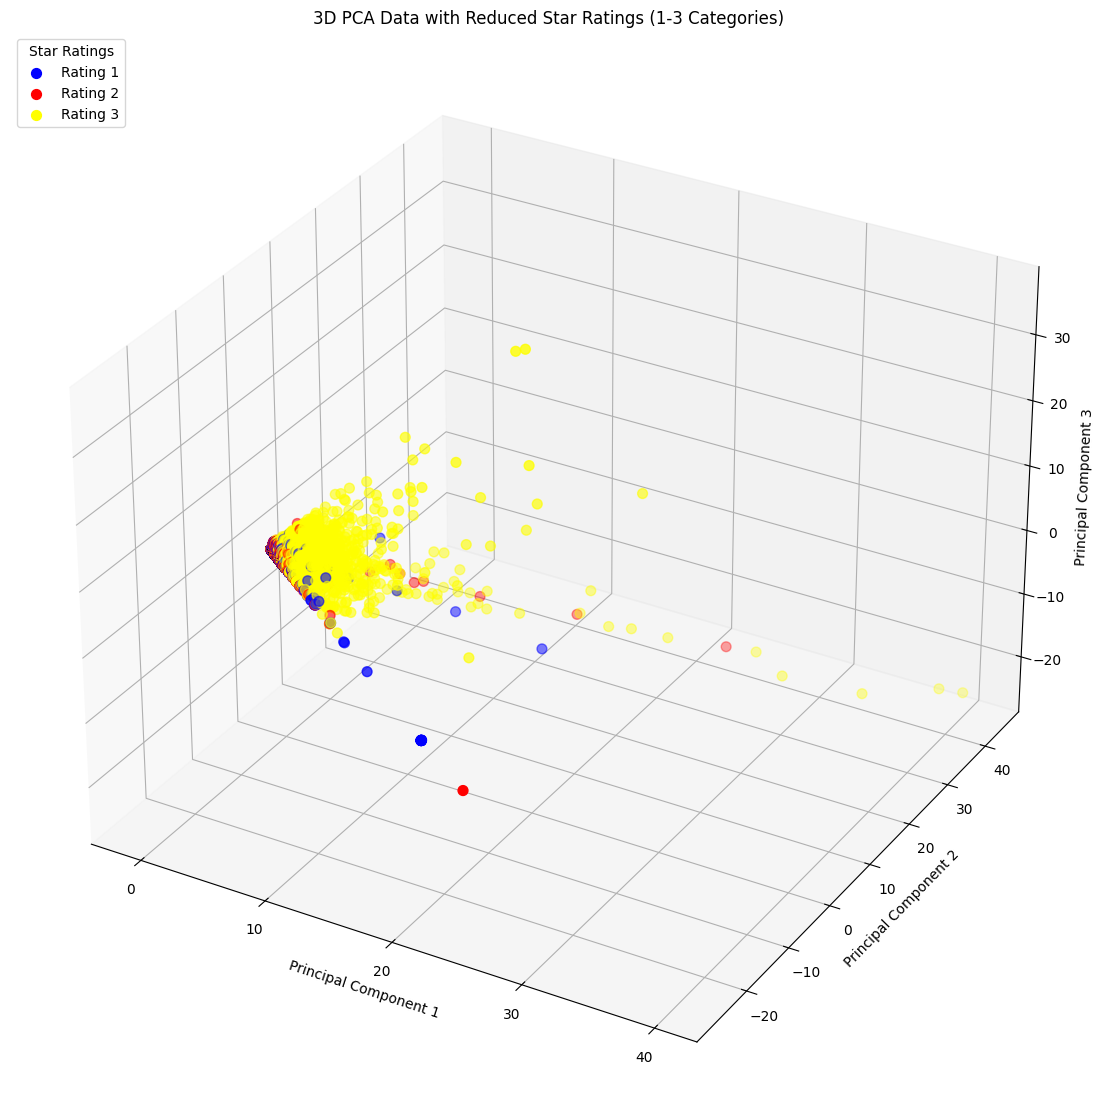

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


colors = ['blue', 'red', 'yellow']  # Choose colors for the 3 categories
cmap = ListedColormap(colors)

fig = plt.figure(figsize=(20, 14))
axi = fig.add_subplot(111, projection='3d')

scatter = axi.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=df_labels, cmap=cmap, s=50)

legend_labels = ['Rating 1', 'Rating 2', 'Rating 3']
handles = []

for i in range(3):
    handle = axi.scatter([], [], c=colors[i], label=legend_labels[i], s=50)
    handles.append(handle)

axi.legend(handles=handles, title='Star Ratings', loc='upper left')

axi.set_title('3D PCA Data with Reduced Star Ratings (1-3 Categories)')
axi.set_xlabel('Principal Component 1')
axi.set_ylabel('Principal Component 2')
axi.set_zlabel('Principal Component 3')
plt.show()


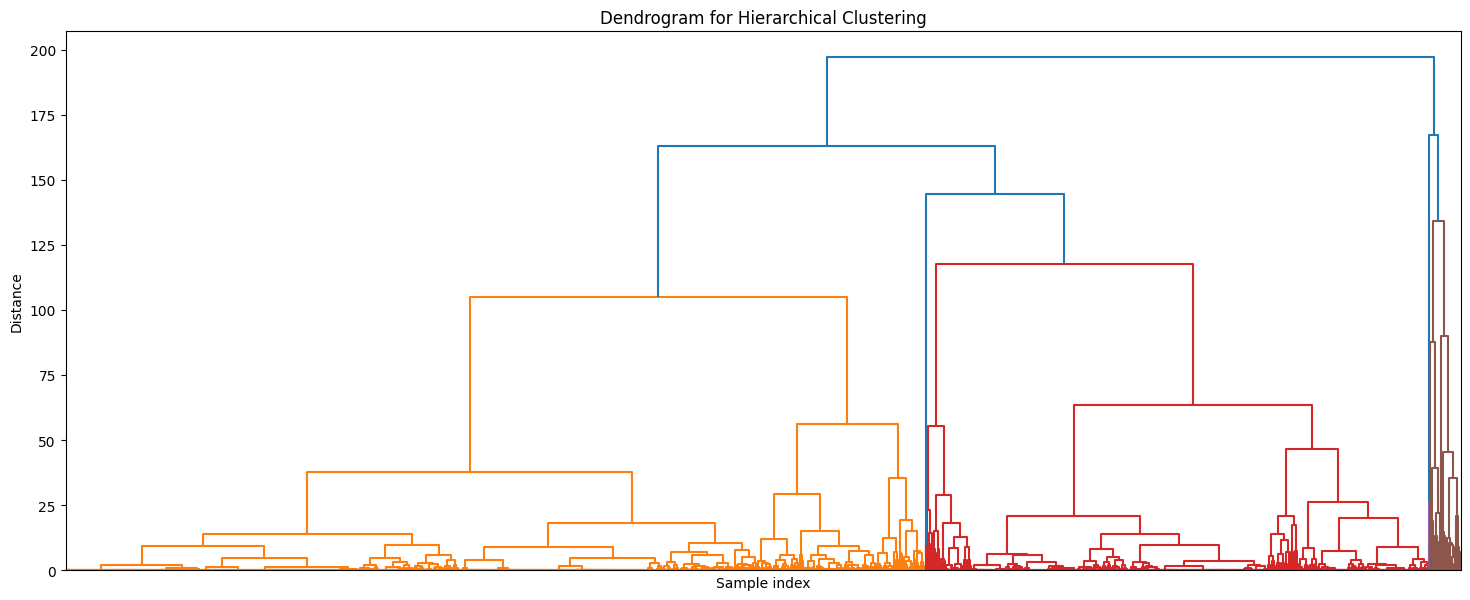

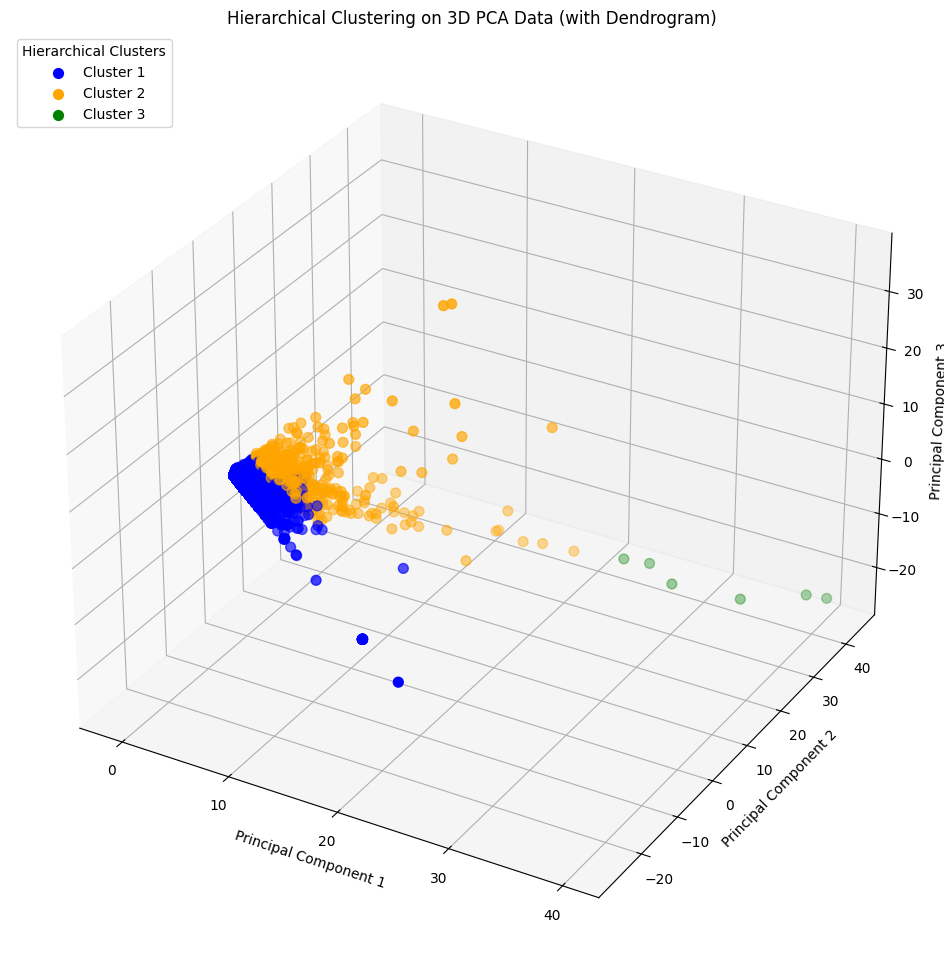

In [102]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


Z = linkage(pca_data, method='ward')

# Create a dendrogram
plt.figure(figsize=(18, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(Z, no_labels=True) 
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Set the number of clusters for Agglomerative Clustering
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters_hierarchical = hierarchical_clustering.fit_predict(pca_data)

# Define colors for the categories
colors = ['blue', 'orange', 'green']  # Choose colors for the 3 categories
cmap = ListedColormap(colors)

# Plotting the clusters in 3D PCA space
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters_hierarchical, cmap=cmap, s=50)

# Define legend labels
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
handles = []

# Create scatter handles for legend
for i in range(n_clusters):
    handle = ax.scatter([], [], c=colors[i], label=legend_labels[i], s=50)
    handles.append(handle)

ax.legend(handles=handles, title='Hierarchical Clusters', loc='upper left')

# Set plot title and labels
ax.set_title('Hierarchical Clustering on 3D PCA Data (with Dendrogram)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [101]:
df_pca.iloc[141]

steam_appid           8140.0
owners             1000000.0
average_forever        228.0
average_2weeks           0.0
median_forever          84.0
median_2weeks            0.0
price                  899.0
initialprice           899.0
ccu                     24.0
discount                 0.0
star_rating              3.0
Name: 141, dtype: float64

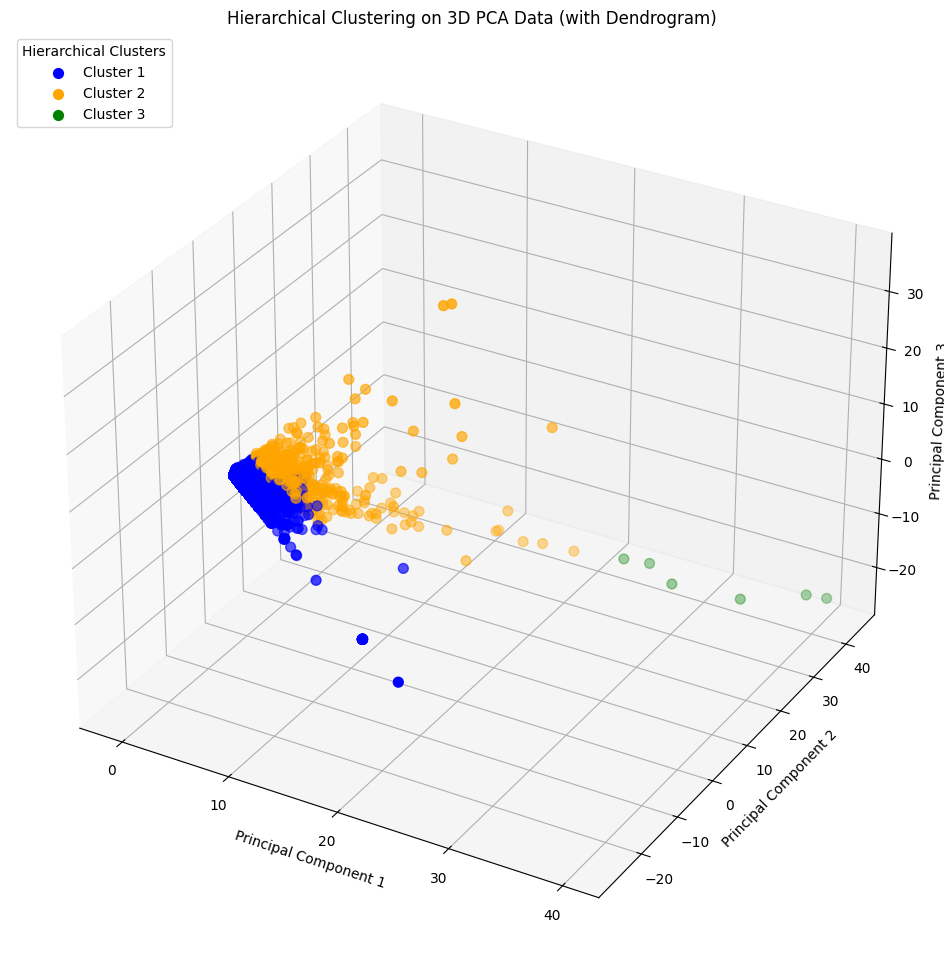

In [43]:
colors = ['blue', 'orange', 'green']  # Choose colors for the 3 categories
cmap = ListedColormap(colors)

# Plotting the clusters in 3D PCA space
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters_hierarchical, cmap=cmap, s=50)

# Define legend labels
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
handles = []

# Create scatter handles for legend
for i in range(n_clusters):
    handle = ax.scatter([], [], c=colors[i], label=legend_labels[i], s=50)
    handles.append(handle)

ax.legend(handles=handles, title='Hierarchical Clusters', loc='upper left')

# Set plot title and labels
ax.set_title('Hierarchical Clustering on 3D PCA Data (with Dendrogram)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

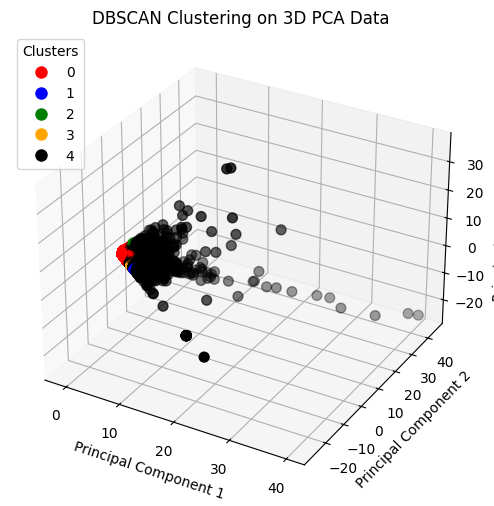

In [104]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Perform DBSCAN
dbscan = DBSCAN(eps=0.38, min_samples=18)  # Tune eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(pca_data)


color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'black'}  # Add more colors as needed

# Step 3: Map the labels to their corresponding colors
colors = [color_map[label] if label in color_map else 'black' for label in dbscan_labels]

# Step 4: Plot the 3D data with DBSCAN clustering labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=colors, s=50)

# Optionally add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10) for i in range(len(color_map))]
labels = list(color_map.keys())
ax.legend(handles, labels, title='Clusters', loc='upper left')

ax.set_title('DBSCAN Clustering on 3D PCA Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


In [239]:
df

,steam_appid,about_the_game,name,developer,publisher,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags,minimum,cum_review,star_rating
0,1002,Featuring a wide collection of single and mult...,Rag Doll Kung Fu,Mark Healey,Mark Healey,50000.0,15,0,29,0,99,99,0,0,English,Indie,"{'2D Fighter': 47, 'Martial Arts': 41, 'Intent...","Pentium3 800 MHz (or compatible), 256 MB RAM, ...",60,2
1,1200,Fight in the theatre of war that changed the w...,Red Orchestra: Ostfront 41-45,Tripwire Interactive,Tripwire Interactive,1000000.0,488,0,238,0,499,499,0,13,"English, French, Russian",Action,"{'World War II': 164, 'Action': 130, 'FPS': 12...",OS: Windows XP Processor: 1.2 GHZ or Equivalen...,1794,3
2,1300,"You are John Blade, commander of HardCorps, an...",SiN Episodes: Emergence,Ritual Entertainment,Ritual Entertainment,200000.0,112,0,175,0,999,999,0,3,"English, Russian, French",Action,"{'Action': 118, 'FPS': 76, 'Cyberpunk': 49, 'S...","1.2 GHz Processor, 256MB RAM, DirectX 7 level ...",874,3
3,1500,Combining fast-paced action with strategic bat...,Darwinia,Introversion Software,Introversion Software,200000.0,456,0,399,0,999,999,0,1,"English, German, French, Italian, Spanish - Spain","Indie, Strategy","{'Indie': 573, 'Tactical RPG': 445, ""Shoot 'Em...","Recommended: Windows XP, 600MHz CPU, 128MB RAM...",630,3
4,1520,"Inspired by the 1983 cult classic film, Wargam...",DEFCON,Introversion Software,Introversion Software,500000.0,172,0,34,0,999,999,0,16,"English, French, German, Italian, Spanish - Spain","Indie, Strategy","{'Cold War': 451, 'Wargame': 438, 'RTS': 431, ...","Recommended: Windows XP, P3-600-Geforce 2, 128...",2982,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20516,1063560,"<img src=""https://steamcdn-a.akamaihd.net/stea...",12 HOURS,Second Reality,Second Reality,20000.0,0,0,0,0,399,399,0,0,"English, Russian, German, Spanish - Spain, Sim...","Action, Indie, Simulation","{'Indie': 34, 'Action': 32, 'Simulation': 30, ...",OS: WindowsXP (Service Pack 3) Processor: Quad...,10,2
20517,1064060,"This game is a point and click, sandbox erotic...",The Mystery of Bikini Island,Velvet Paradise Games,Velvet Paradise Games,20000.0,0,0,0,0,99,99,0,0,English,"Adventure, Casual, Indie, RPG","{'Sexual Content': 34, 'Nudity': 32, 'Adventur...",OS: Windows 7+ Processor: Intel i3 or equivale...,7,1
20518,1064580,"In the game you control the spacecraft, and in...",CaptainMarlene,Dnovel,Conglomerate 5,20000.0,0,0,0,0,99,99,0,0,"English, French, German, Spanish - Spain, Trad...","Adventure, Indie","{'Indie': 31, 'Adventure': 30, 'Casual': 12, '...",OS: Windows 7 or later Processor: intel x86 fa...,11,2
20519,1065160,You are an overworked business man who had a l...,Deatherem,Anima,Team Syukino,20000.0,0,0,0,0,0,0,0,0,English,Indie,"{'Indie': 31, 'Horror': 12, 'First-Person': 11...",最低配置: 操作系统: Windows 7/8.1/10 处理器: Intel Core 2...,-8,1


In [106]:
import ast

In [107]:
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [108]:
df['tags_list'] = df['tags'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else [])


In [109]:
df['transaction'] = df.apply(lambda row: row['genre'].split(', ') + row['tags_list'], axis=1)

print(df[['transaction']])

                                             transaction
0      [Indie, 2D Fighter, Martial Arts, Intentionall...
1      [Action, World War II, Action, FPS, Realistic,...
2      [Action, Action, FPS, Cyberpunk, Sci-fi, Shoot...
3      [Indie, Strategy, Indie, Tactical RPG, Shoot '...
4      [Indie, Strategy, Cold War, Wargame, RTS, Tact...
...                                                  ...
20516  [Action, Indie, Simulation, Indie, Action, Sim...
20517  [Adventure, Casual, Indie, RPG, Sexual Content...
20518  [Adventure, Indie, Indie, Adventure, Casual, A...
20519  [Indie, Indie, Horror, First-Person, Survival ...
20520  [Adventure, Casual, Indie, Puzzle, Investigati...

[20521 rows x 1 columns]


In [110]:
df = df.sample(10000, random_state=42)

In [112]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt

transactions = df['transaction'].tolist()

te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

top_15_support = rules.nlargest(15, 'support')

top_15_confidence = rules.nlargest(15, 'confidence')

top_15_lift = rules.nlargest(15, 'lift')

print("Top 15 Rules by Support:")
print(top_15_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nTop 15 Rules by Confidence:")
print(top_15_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nTop 15 Rules by Lift:")
print(top_15_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 15 Rules by Support:
        antecedents     consequents  support  confidence      lift
111         (Indie)        (Action)   0.3881    0.508317  1.048941
112        (Action)         (Indie)   0.3881    0.800867  1.048941
334        (Casual)         (Indie)   0.3424    0.821300  1.075704
335         (Indie)        (Casual)   0.3424    0.448461  1.075704
210     (Adventure)         (Indie)   0.3363    0.785748  1.029139
211         (Indie)     (Adventure)   0.3363    0.440472  1.029139
565  (Singleplayer)         (Indie)   0.2836    0.769398  1.007725
69      (Adventure)        (Action)   0.2108    0.492523  1.016350
70         (Action)     (Adventure)   0.2108    0.434998  1.016350
147  (Singleplayer)        (Action)   0.1930    0.523603  1.080485
243     (Adventure)  (Singleplayer)   0.1905    0.445093  1.207524
244  (Singleplayer)     (Adventure)   0.1905    0.516820  1.207524
25             (2D)         (Indie)   0.1802    0.905073  1.185426
570      (Strategy)         (Indie)  

In [114]:
print("Top 15 Rules by Support:")
top_15_support

Top 15 Rules by Support:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
111,(Indie),(Action),0.7635,0.4846,0.3881,0.508317,1.048941,0.018108,1.048236,0.197285
112,(Action),(Indie),0.4846,0.7635,0.3881,0.800867,1.048941,0.018108,1.187647,0.090527
334,(Casual),(Indie),0.4169,0.7635,0.3424,0.821300,1.075704,0.024097,1.323448,0.120693
335,(Indie),(Casual),0.7635,0.4169,0.3424,0.448461,1.075704,0.024097,1.057224,0.297574
210,(Adventure),(Indie),0.4280,0.7635,0.3363,0.785748,1.029139,0.009522,1.103839,0.049500
211,(Indie),(Adventure),0.7635,0.4280,0.3363,0.440472,1.029139,0.009522,1.022289,0.119721
565,(Singleplayer),(Indie),0.3686,0.7635,0.2836,0.769398,1.007725,0.002174,1.025575,0.012140
69,(Adventure),(Action),0.4280,0.4846,0.2108,0.492523,1.016350,0.003391,1.015613,0.028125
70,(Action),(Adventure),0.4846,0.4280,0.2108,0.434998,1.016350,0.003391,1.012386,0.031213
147,(Singleplayer),(Action),0.3686,0.4846,0.1930,0.523603,1.080485,0.014376,1.081870,0.117975


In [115]:
print("Top 15 Rules by Confidence:")
top_15_confidence

Top 15 Rules by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
160,(Twin Stick Shooter),(Action),0.0161,0.4846,0.0161,1.0,2.063558,0.008298,inf,0.523834
650,(Party-Based RPG),(RPG),0.0108,0.1915,0.0108,1.0,5.221932,0.008732,inf,0.817327
684,(RTS),(Strategy),0.0257,0.2379,0.0257,1.0,4.203447,0.019586,inf,0.782203
2091,"(Twin Stick Shooter, Indie)",(Action),0.0150,0.4846,0.0150,1.0,2.063558,0.007731,inf,0.523249
2200,"(Action, RTS)",(Strategy),0.0114,0.2379,0.0114,1.0,4.203447,0.008688,inf,0.770888
2247,"(Shooter, Top-Down Shooter)",(Action),0.0119,0.4846,0.0119,1.0,2.063558,0.006133,inf,0.521607
4521,"(VR, Free To Play)",(Free to Play),0.0122,0.0973,0.0122,1.0,10.277492,0.011013,inf,0.913849
4923,"(Indie, RTS)",(Strategy),0.0147,0.2379,0.0147,1.0,4.203447,0.011203,inf,0.773470
5324,"(Simulation, RTS)",(Strategy),0.0102,0.2379,0.0102,1.0,4.203447,0.007773,inf,0.769954
5325,"(Singleplayer, RTS)",(Strategy),0.0138,0.2379,0.0138,1.0,4.203447,0.010517,inf,0.772764


In [117]:
print("Top 15 Rules by Lift:")
top_15_lift

Top 15 Rules by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7497,"(Action Roguelike, Indie)","(Rogue-lite, Action)",0.0145,0.0166,0.0115,0.793103,47.777316,0.011259,4.753100,0.993475
7500,"(Rogue-lite, Action)","(Action Roguelike, Indie)",0.0166,0.0145,0.0115,0.692771,47.777316,0.011259,3.207706,0.995596
7495,"(Indie, Rogue-lite, Action)",(Action Roguelike),0.0164,0.0147,0.0115,0.701220,47.702008,0.011259,3.297739,0.995360
7501,(Action Roguelike),"(Indie, Rogue-lite, Action)",0.0147,0.0164,0.0115,0.782313,47.702008,0.011259,4.518413,0.993643
1422,"(Rogue-lite, Action)",(Action Roguelike),0.0166,0.0147,0.0116,0.698795,47.537087,0.011356,3.271196,0.995489
1423,(Action Roguelike),"(Rogue-lite, Action)",0.0147,0.0166,0.0116,0.789116,47.537087,0.011356,4.663219,0.993569
7485,"(Indie, Rogue-like, Action)",(Action Roguelike),0.0191,0.0147,0.0105,0.549738,37.397158,0.010219,2.188283,0.992211
7491,(Action Roguelike),"(Indie, Rogue-like, Action)",0.0147,0.0191,0.0105,0.714286,37.397158,0.010219,3.433150,0.987780
7498,"(Action Roguelike, Action)","(Indie, Rogue-lite)",0.0144,0.0224,0.0115,0.798611,35.652282,0.011177,4.854290,0.986152
7499,"(Indie, Rogue-lite)","(Action Roguelike, Action)",0.0224,0.0144,0.0115,0.513393,35.652282,0.011177,2.025453,0.994222


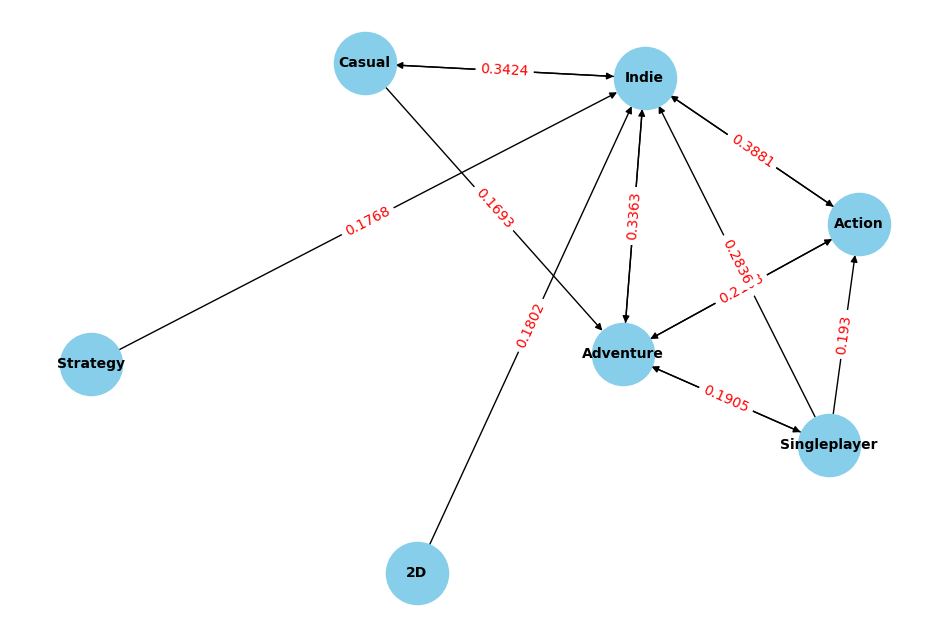

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_association_rules(rules, metric):
    G = nx.DiGraph()

    # Add nodes and edges with the selected metric as the weight
    for _, rule in rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        
        # Add nodes for all antecedents and consequents
        G.add_nodes_from(antecedents)
        G.add_nodes_from(consequents)
        
        # Add edges with weight
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_edge(antecedent, consequent, weight=rule[metric])

    # Create figure and axis explicitly
    fig, ax = plt.subplots(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Position nodes

    # Draw the network graph
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", ax=ax)
    
    # Get edge attributes (weights) for displaying on edges
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', ax=ax)

    # Show the plot
    plt.show()

# Call the function with the top 15 support rules
plot_association_rules(top_15_support, 'support')


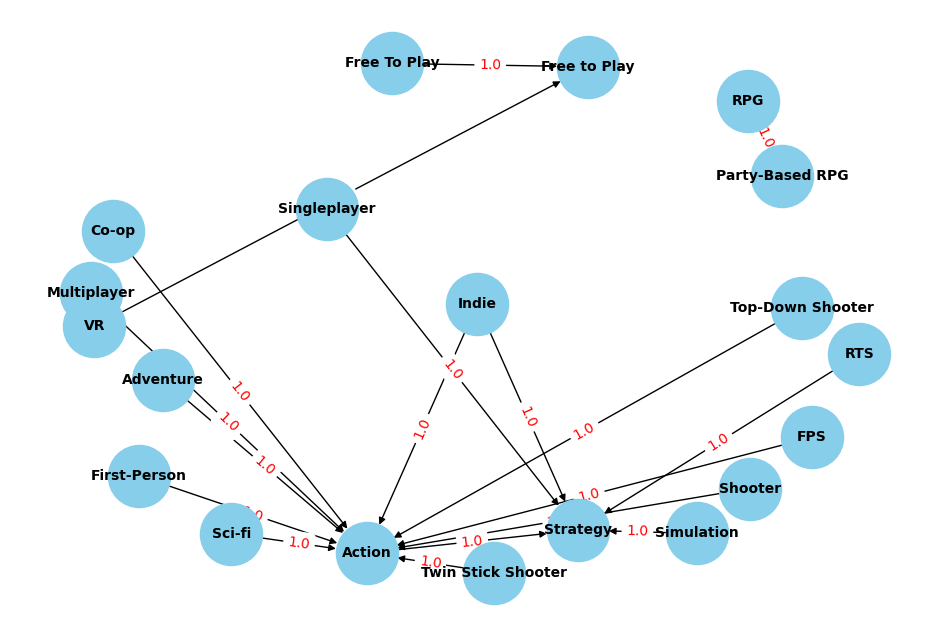

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_association_rules(rules, metric):
    G = nx.DiGraph()

    # Add edges with the selected metric as the weight
    for _, rule in rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        
        # Add nodes for all antecedents and consequents
        G.add_nodes_from(antecedents)
        G.add_nodes_from(consequents)
        
        # Add edges with weight
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_edge(antecedent, consequent, weight=rule[metric])

    # Create figure and axis explicitly
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Adjust the spring layout with a larger k value to increase node spacing
    pos = nx.spring_layout(G, k=1.5, iterations=50)  # Increase k for more space

    # Draw the network graph
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", ax=ax)
    
    # Get edge attributes (weights) for displaying on edges
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', ax=ax)
    # Show the plot
    plt.show()
# Call the function with the top 15 confidence rules
plot_association_rules(top_15_confidence, 'confidence')